Intercept 6.0442433539171185
Prediction_local [7.03526716]
Right: 7.218475125839501


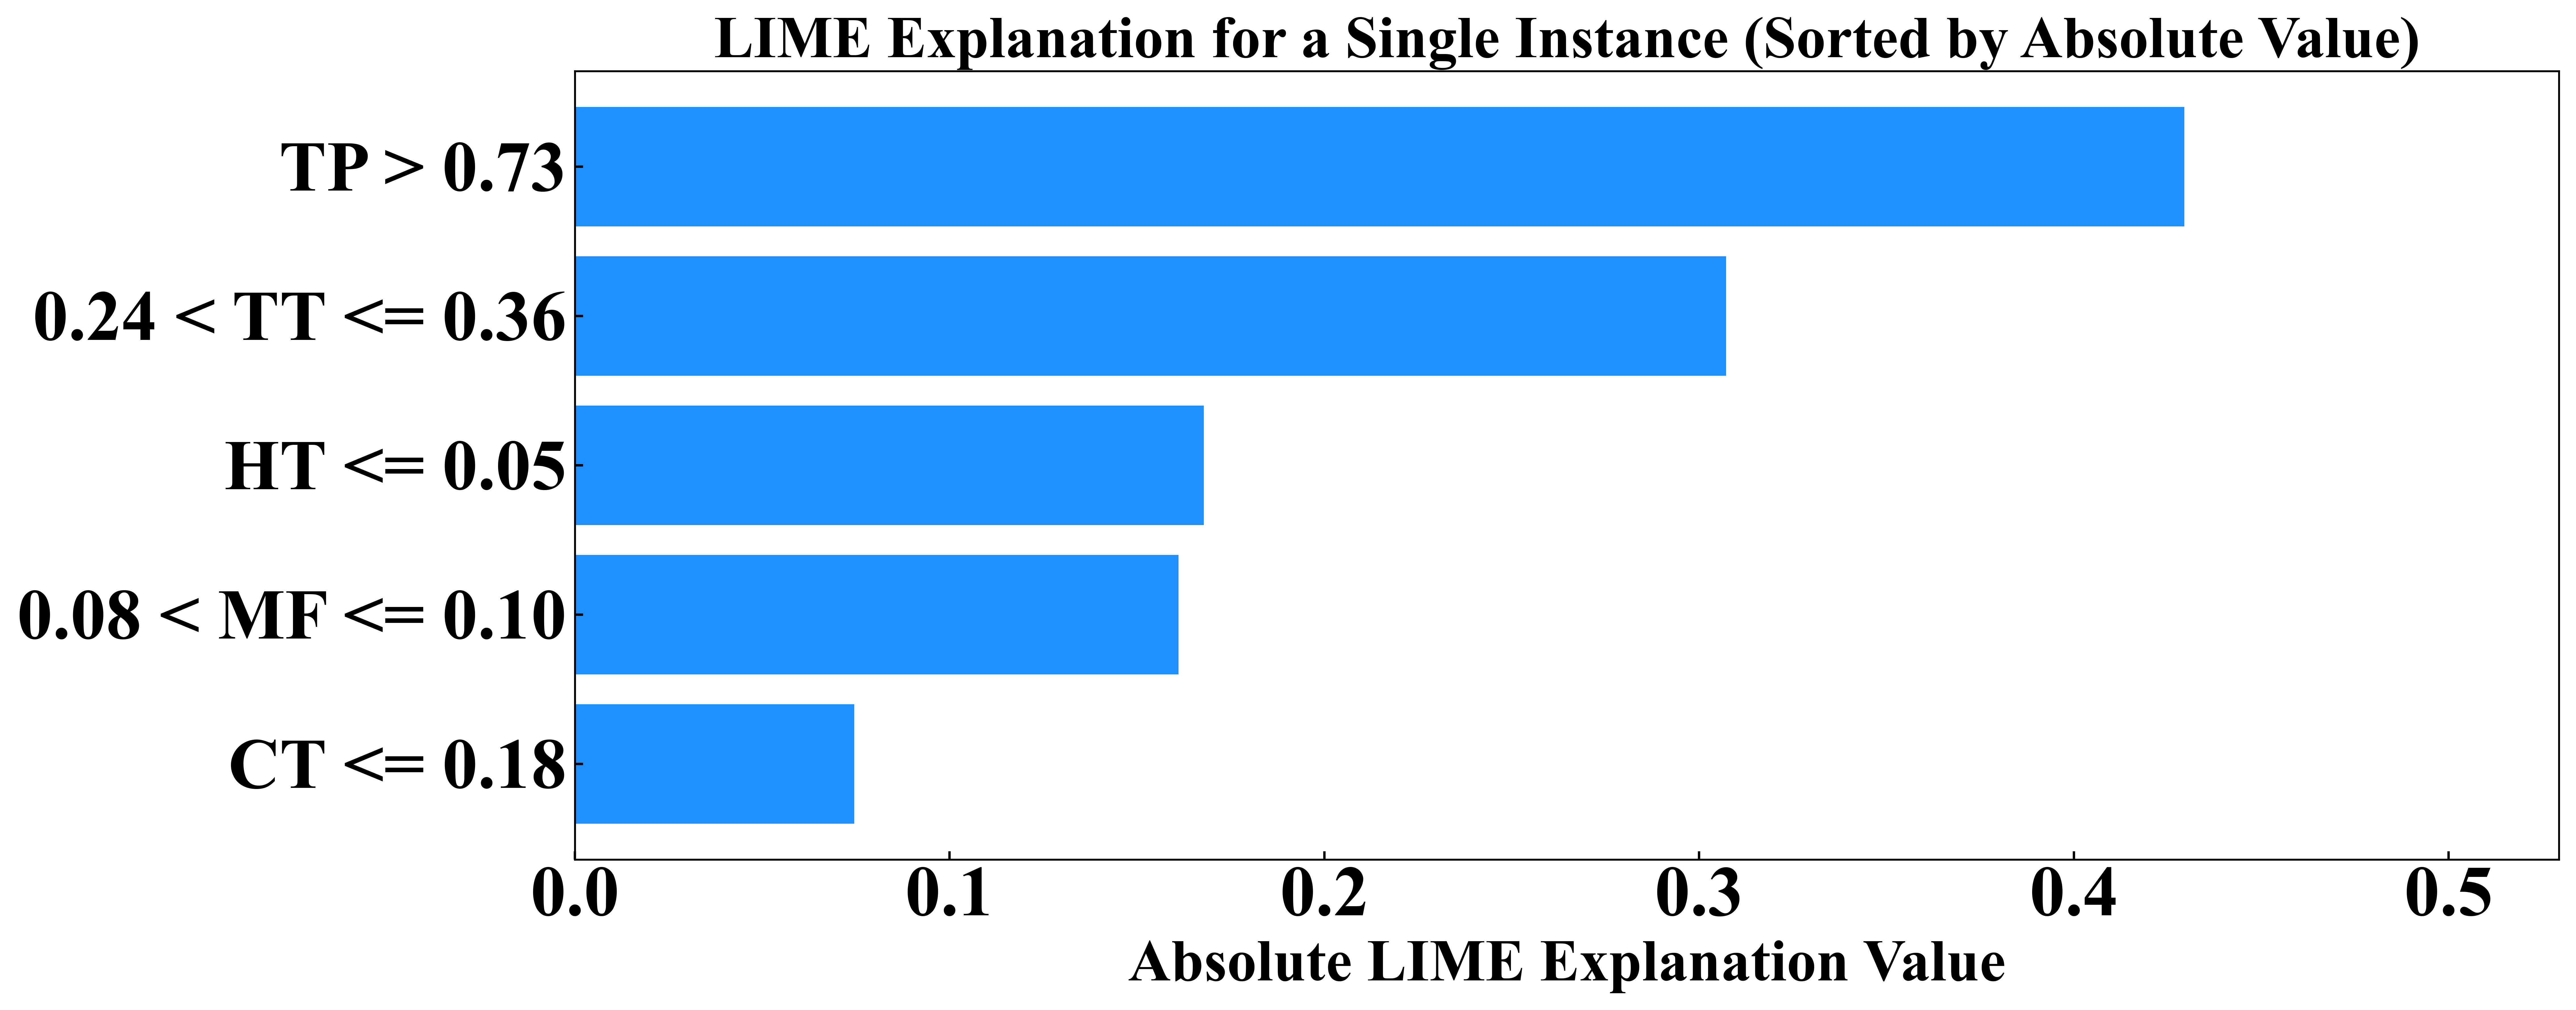

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# Load data
features = pd.read_excel('LIME.xlsx')
label1 = features['2Nf'].to_numpy()
label1 = label1 / 2
features = features.drop(['2Nf'], axis=1)
feature_names = features.columns  # Extract column names before conversion
features = MinMaxScaler().fit_transform(features)
label1 = np.log(label1)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, label1, test_size=0.25, random_state=42)

# Convert feature names to a list
feature_names_list = list(feature_names)


# Create the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Create the LIME explainer
explainer = LimeTabularExplainer(X_train, feature_names=feature_names_list,
                                 class_names=['log(2Nf/2)'], verbose=True, mode='regression')

# Choose an instance to explain (for example, the first instance in the validation set)
instance_index = 0
instance = X_val_weighted[instance_index]

# Explain the prediction for the chosen instance
explanation = explainer.explain_instance(instance, model.predict, num_features=10)

# Extract the LIME explanation values and feature names
exp_values = explanation.as_list()

# Sort the values by absolute magnitude
exp_values_sorted = sorted(exp_values, key=lambda x: abs(x[1]), reverse=True)

# Prepare data for plotting
features_sorted = [x[0] for x in exp_values_sorted]
values_sorted = [abs(x[1]) for x in exp_values_sorted]  # Take the absolute value

# Plot the explanation
plt.figure(figsize=(15, 6), dpi=600)  # Set figure resolution to 600 dpi
plt.barh(features_sorted, values_sorted, color='dodgerblue')  # Set bar color to blue
plt.xlabel('Absolute LIME Explanation Value', fontsize=25, fontweight='bold', fontname='Times New Roman')
plt.title('LIME Explanation for a Single Instance (Sorted by Absolute Value)', fontsize=25,fontweight='bold', fontname='Times New Roman')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Adjust x-axis range dynamically
plt.xlim(0, max(values_sorted) + 0.1)
plt.xticks(fontsize=30, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=30, fontweight='bold', fontname='Times New Roman')

# Set tick direction to 'in'
plt.tick_params(axis='both', direction='in', width=1)  # Set tick direction to 'in' and tick width

plt.show()

Intercept 6.018016403030011
Prediction_local [7.11453308]
Right: 7.218475125839501


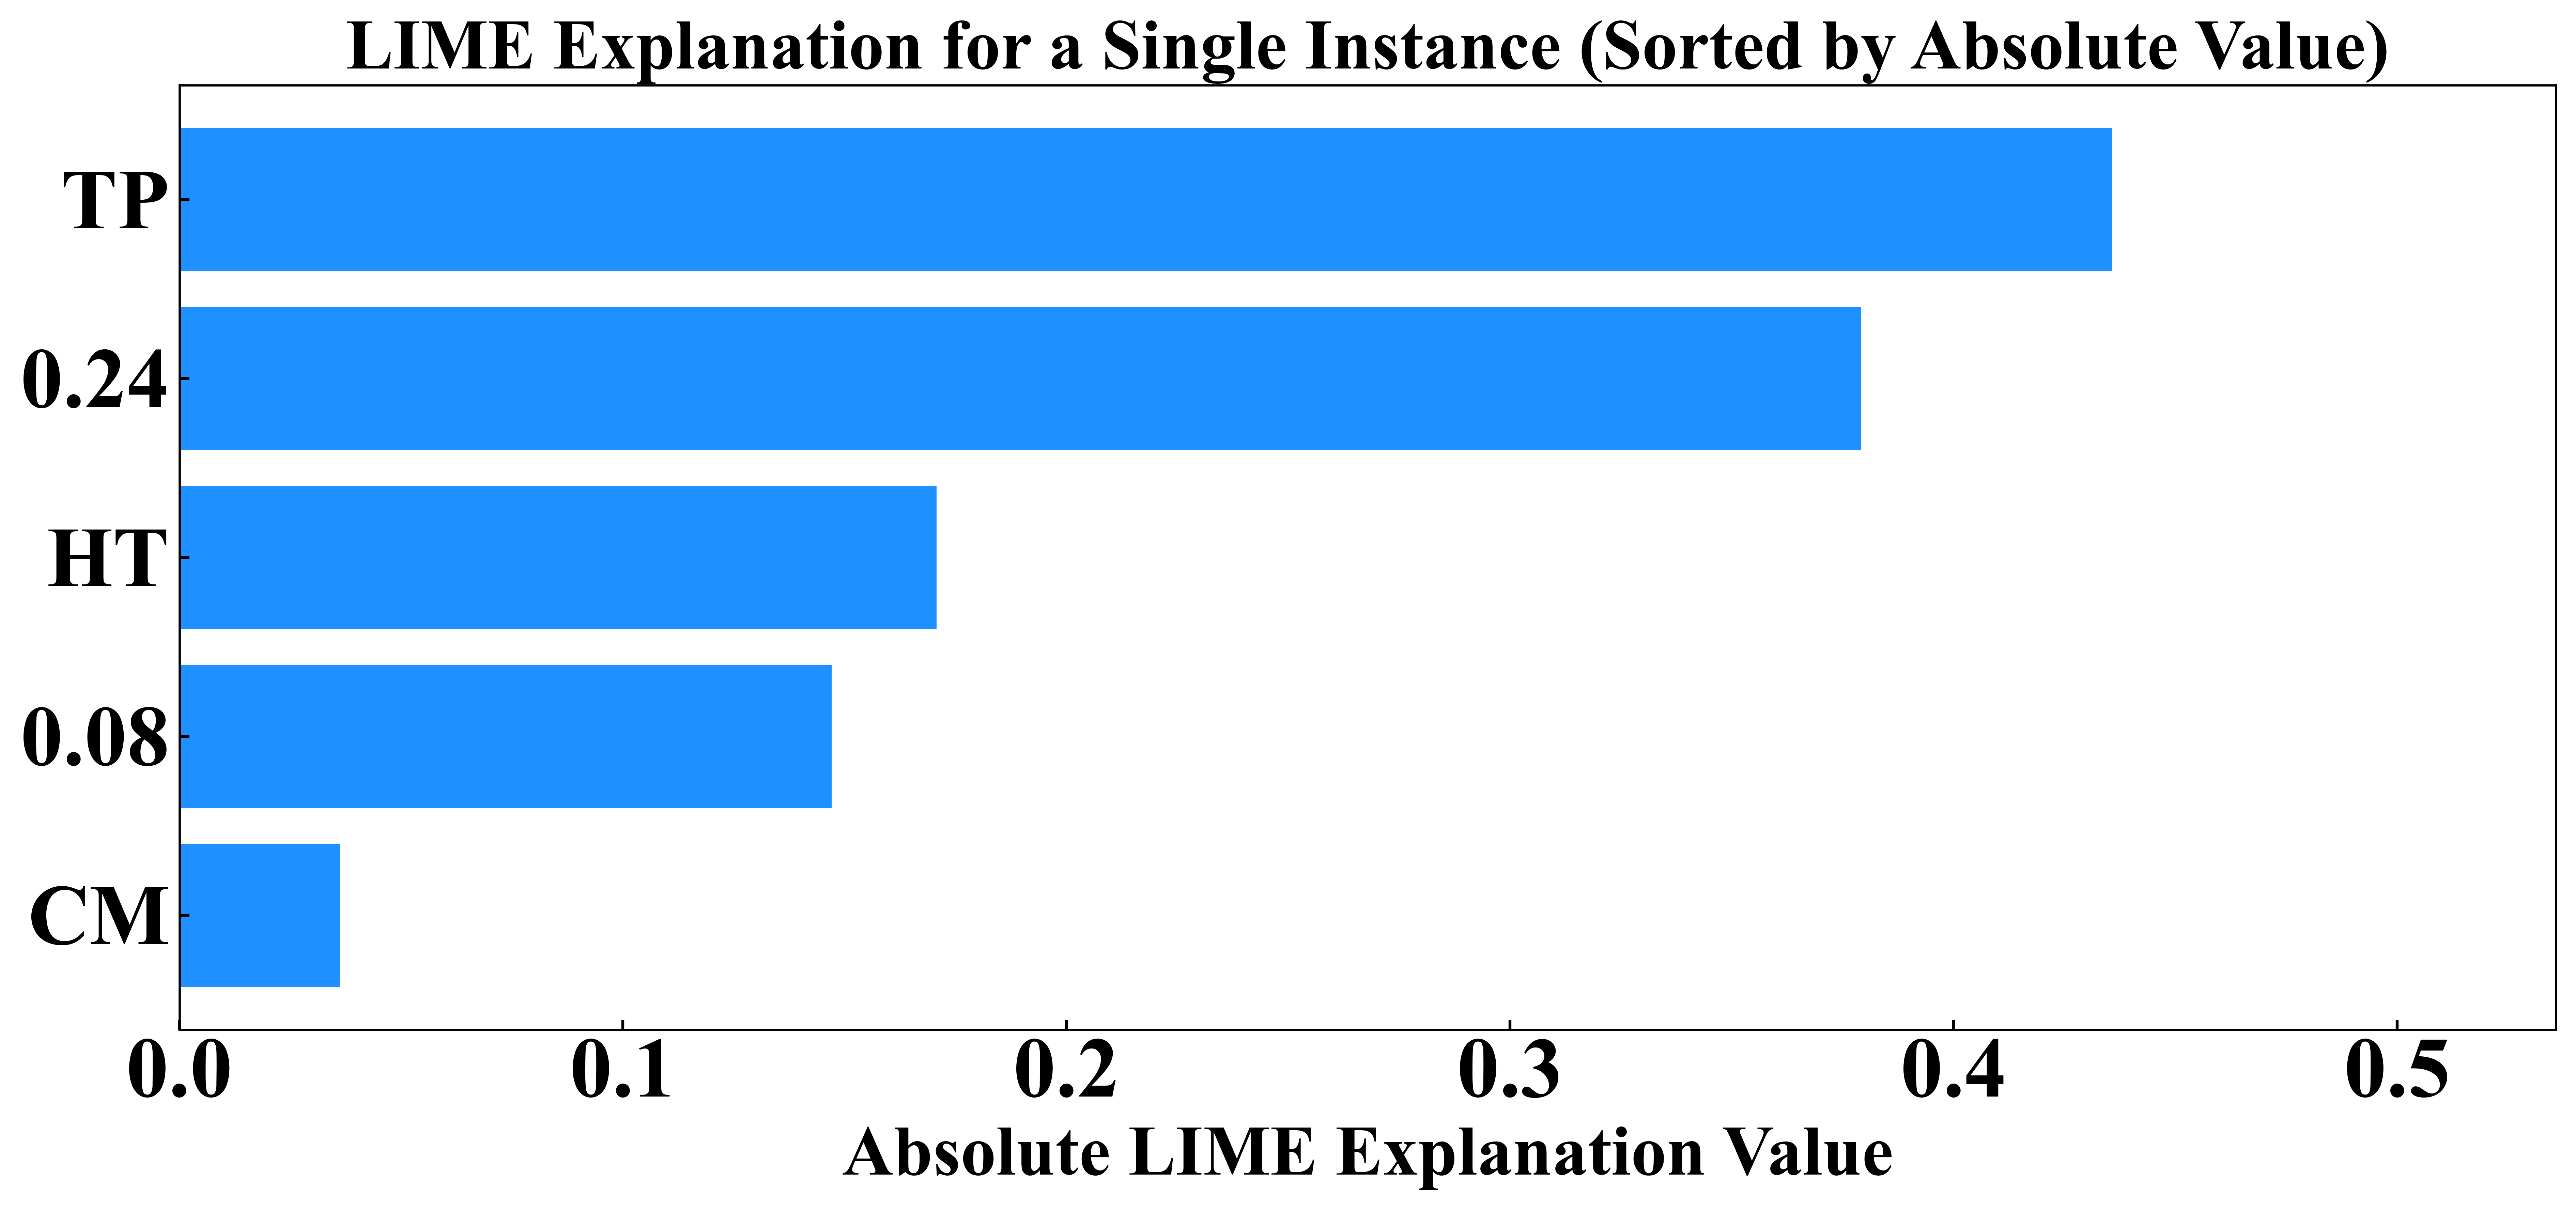

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
import re

# Load data
features = pd.read_excel('LIME.xlsx')
label1 = features['2Nf'].to_numpy()
label1 = label1 / 2
features = features.drop(['2Nf'], axis=1)
feature_names = features.columns  # Extract column names before conversion
features = MinMaxScaler().fit_transform(features)
label1 = np.log(label1)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, label1, test_size=0.25, random_state=42)

# Convert feature names to a list
feature_names_list = list(feature_names)

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Create the LIME explainer
explainer = LimeTabularExplainer(X_train, feature_names=feature_names_list,
                                 class_names=['log(2Nf/2)'], verbose=True, mode='regression')

# Choose an instance to explain (for example, the first instance in the validation set)
instance_index = 0
instance = X_val[instance_index]

# Explain the prediction for the chosen instance
explanation = explainer.explain_instance(instance, model.predict, num_features=10)

# Extract the LIME explanation values and feature names
exp_values = explanation.as_list()

# Sort the values by absolute magnitude
exp_values_sorted = sorted(exp_values, key=lambda x: abs(x[1]), reverse=True)

# Prepare data for plotting
features_sorted = [re.split('>|<|=| ', x[0])[0] for x in exp_values_sorted]  # Extract feature names only, ignoring any operators or numbers
values_sorted = [abs(x[1]) for x in exp_values_sorted]  # Take the absolute value

# Plot the explanation
plt.figure(figsize=(15, 6), dpi=600)  # Set figure resolution to 600 dpi
plt.barh(features_sorted, values_sorted, color='dodgerblue')  # Set bar color to blue
plt.xlabel('Absolute LIME Explanation Value', fontsize=25, fontweight='bold', fontname='Times New Roman')
plt.title('LIME Explanation for a Single Instance (Sorted by Absolute Value)', fontsize=25,fontweight='bold', fontname='Times New Roman')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Adjust x-axis range dynamically
plt.xlim(0, max(values_sorted) + 0.1)
plt.xticks(fontsize=30, fontweight='bold', fontname='Times New Roman')
plt.yticks(ticks=range(len(features_sorted)), labels=features_sorted, fontsize=30, fontweight='bold', fontname='Times New Roman')

# Set tick direction to 'in'
plt.tick_params(axis='both', direction='in', width=1)  # Set tick direction to 'in' and tick width

plt.show()